In [17]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-07-15 15:35:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   272MB/s    in 1.8s    

2022-07-15 15:35:11 (272 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [18]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

In [19]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [20]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 512, 3)


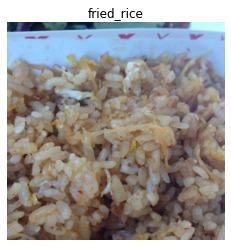

In [22]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_data  = train_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

test_data  = test_datagen.flow_from_directory(train_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')

Found 7500 images belonging to 10 classes.
Found 7500 images belonging to 10 classes.


In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


model_9 = Sequential([
                      Conv2D(10, 3, activation = 'relu', input_shape = (224,224,3)),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Conv2D(10, 3, activation = 'relu'),
                      Conv2D(10, 3, activation = 'relu'),
                      MaxPool2D(),
                      Flatten(),
                      Dense(10, activation = 'softmax')
])

model_9.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [25]:
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 67s 284ms/step - loss: 2.1162 - accuracy: 0.2320 - val_loss: 1.9012 - val_accuracy: 0.3429
Epoch 2/5
235/235 [==============================] - 66s 279ms/step - loss: 1.7815 - accuracy: 0.3815 - val_loss: 1.6209 - val_accuracy: 0.4597
Epoch 3/5
235/235 [==============================] - 67s 286ms/step - loss: 1.4359 - accuracy: 0.5203 - val_loss: 1.0215 - val_accuracy: 0.7071
Epoch 4/5
235/235 [==============================] - 66s 280ms/step - loss: 0.8468 - accuracy: 0.7232 - val_loss: 0.3895 - val_accuracy: 0.9217
Epoch 5/5
235/235 [==============================] - 66s 283ms/step - loss: 0.3148 - accuracy: 0.9076 - val_loss: 0.1109 - val_accuracy: 0.9808


In [26]:
model_9.evaluate(test_data)

235/235 [==============================] - 33s 139ms/step - loss: 0.1109 - accuracy: 0.9808


[0.11093702912330627, 0.9807999730110168]

In [27]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

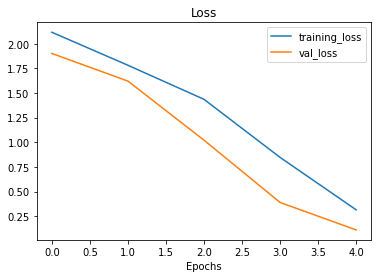

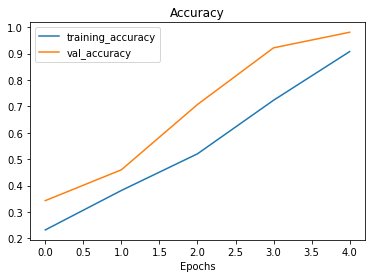

In [28]:
plot_loss_curves(history_9)

In [31]:
model_10 = Sequential([
                       Conv2D(10, 3, activation = 'relu', input_shape =(224,224,3)),
                       MaxPool2D(),
                       Conv2D(10, 3, activation = 'relu'),
                       MaxPool2D(),
                       Flatten(),
                       Dense(10, activation = 'softmax')

])

model_10.compile(loss = 'categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs = 5,
                          steps_per_epoch = len(train_data),
                          validation_data = test_data,
                          validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 63s 268ms/step - loss: 2.1838 - accuracy: 0.2164 - val_loss: 1.9186 - val_accuracy: 0.3201
Epoch 2/5
235/235 [==============================] - 63s 269ms/step - loss: 1.8691 - accuracy: 0.3524 - val_loss: 1.5772 - val_accuracy: 0.4853
Epoch 3/5
235/235 [==============================] - 62s 263ms/step - loss: 1.5206 - accuracy: 0.5004 - val_loss: 1.0995 - val_accuracy: 0.7007
Epoch 4/5
235/235 [==============================] - 63s 267ms/step - loss: 1.0099 - accuracy: 0.6836 - val_loss: 0.6706 - val_accuracy: 0.8447
Epoch 5/5
235/235 [==============================] - 62s 266ms/step - loss: 0.5501 - accuracy: 0.8415 - val_loss: 0.2502 - val_accuracy: 0.9581


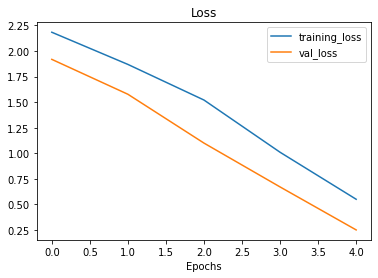

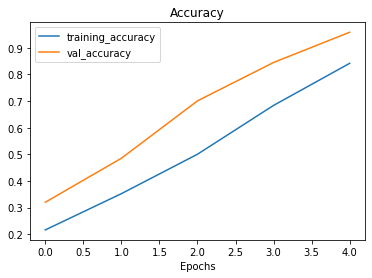

In [32]:
plot_loss_curves(history_10)

In [33]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')


Found 7500 images belonging to 10 classes.


In [35]:
model_11 = tf.keras.models.clone_model(model_10)

model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented, 
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

235/235 [==============================] - 129s 549ms/step - loss: 2.3811 - accuracy: 0.1664 - val_loss: 2.0800 - val_accuracy: 0.2579


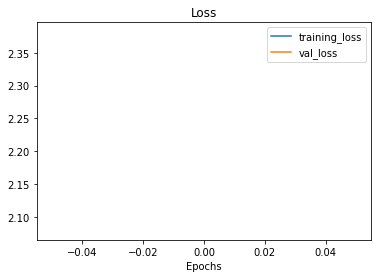

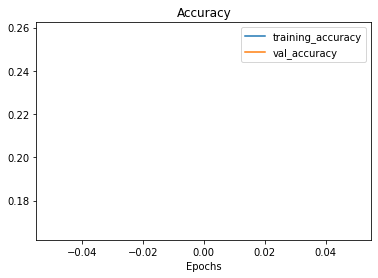

In [37]:
plot_loss_curves(history_11)

In [38]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [39]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [46]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [47]:
def pred_and_plot(model, filename, class_names):

  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

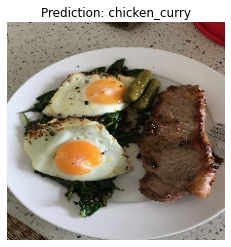

In [48]:
pred_and_plot(model=model_11, 
              filename="03-steak.jpeg", 
              class_names=class_names)

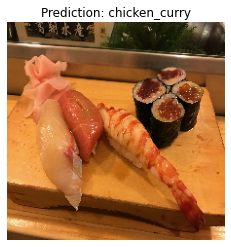

In [49]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

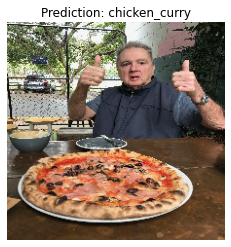

In [50]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

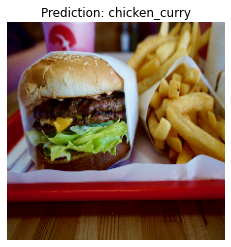

In [51]:
pred_and_plot(model_11, "03-hamburger.jpeg", class_names)

In [52]:
model_11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [53]:
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

235/235 [==============================] - 31s 132ms/step - loss: 2.0800 - accuracy: 0.2579


[2.080035924911499, 0.25786668062210083]

In [54]:
model_11.evaluate(test_data)

235/235 [==============================] - 31s 132ms/step - loss: 2.0800 - accuracy: 0.2579


[2.0800349712371826, 0.25786668062210083]